<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

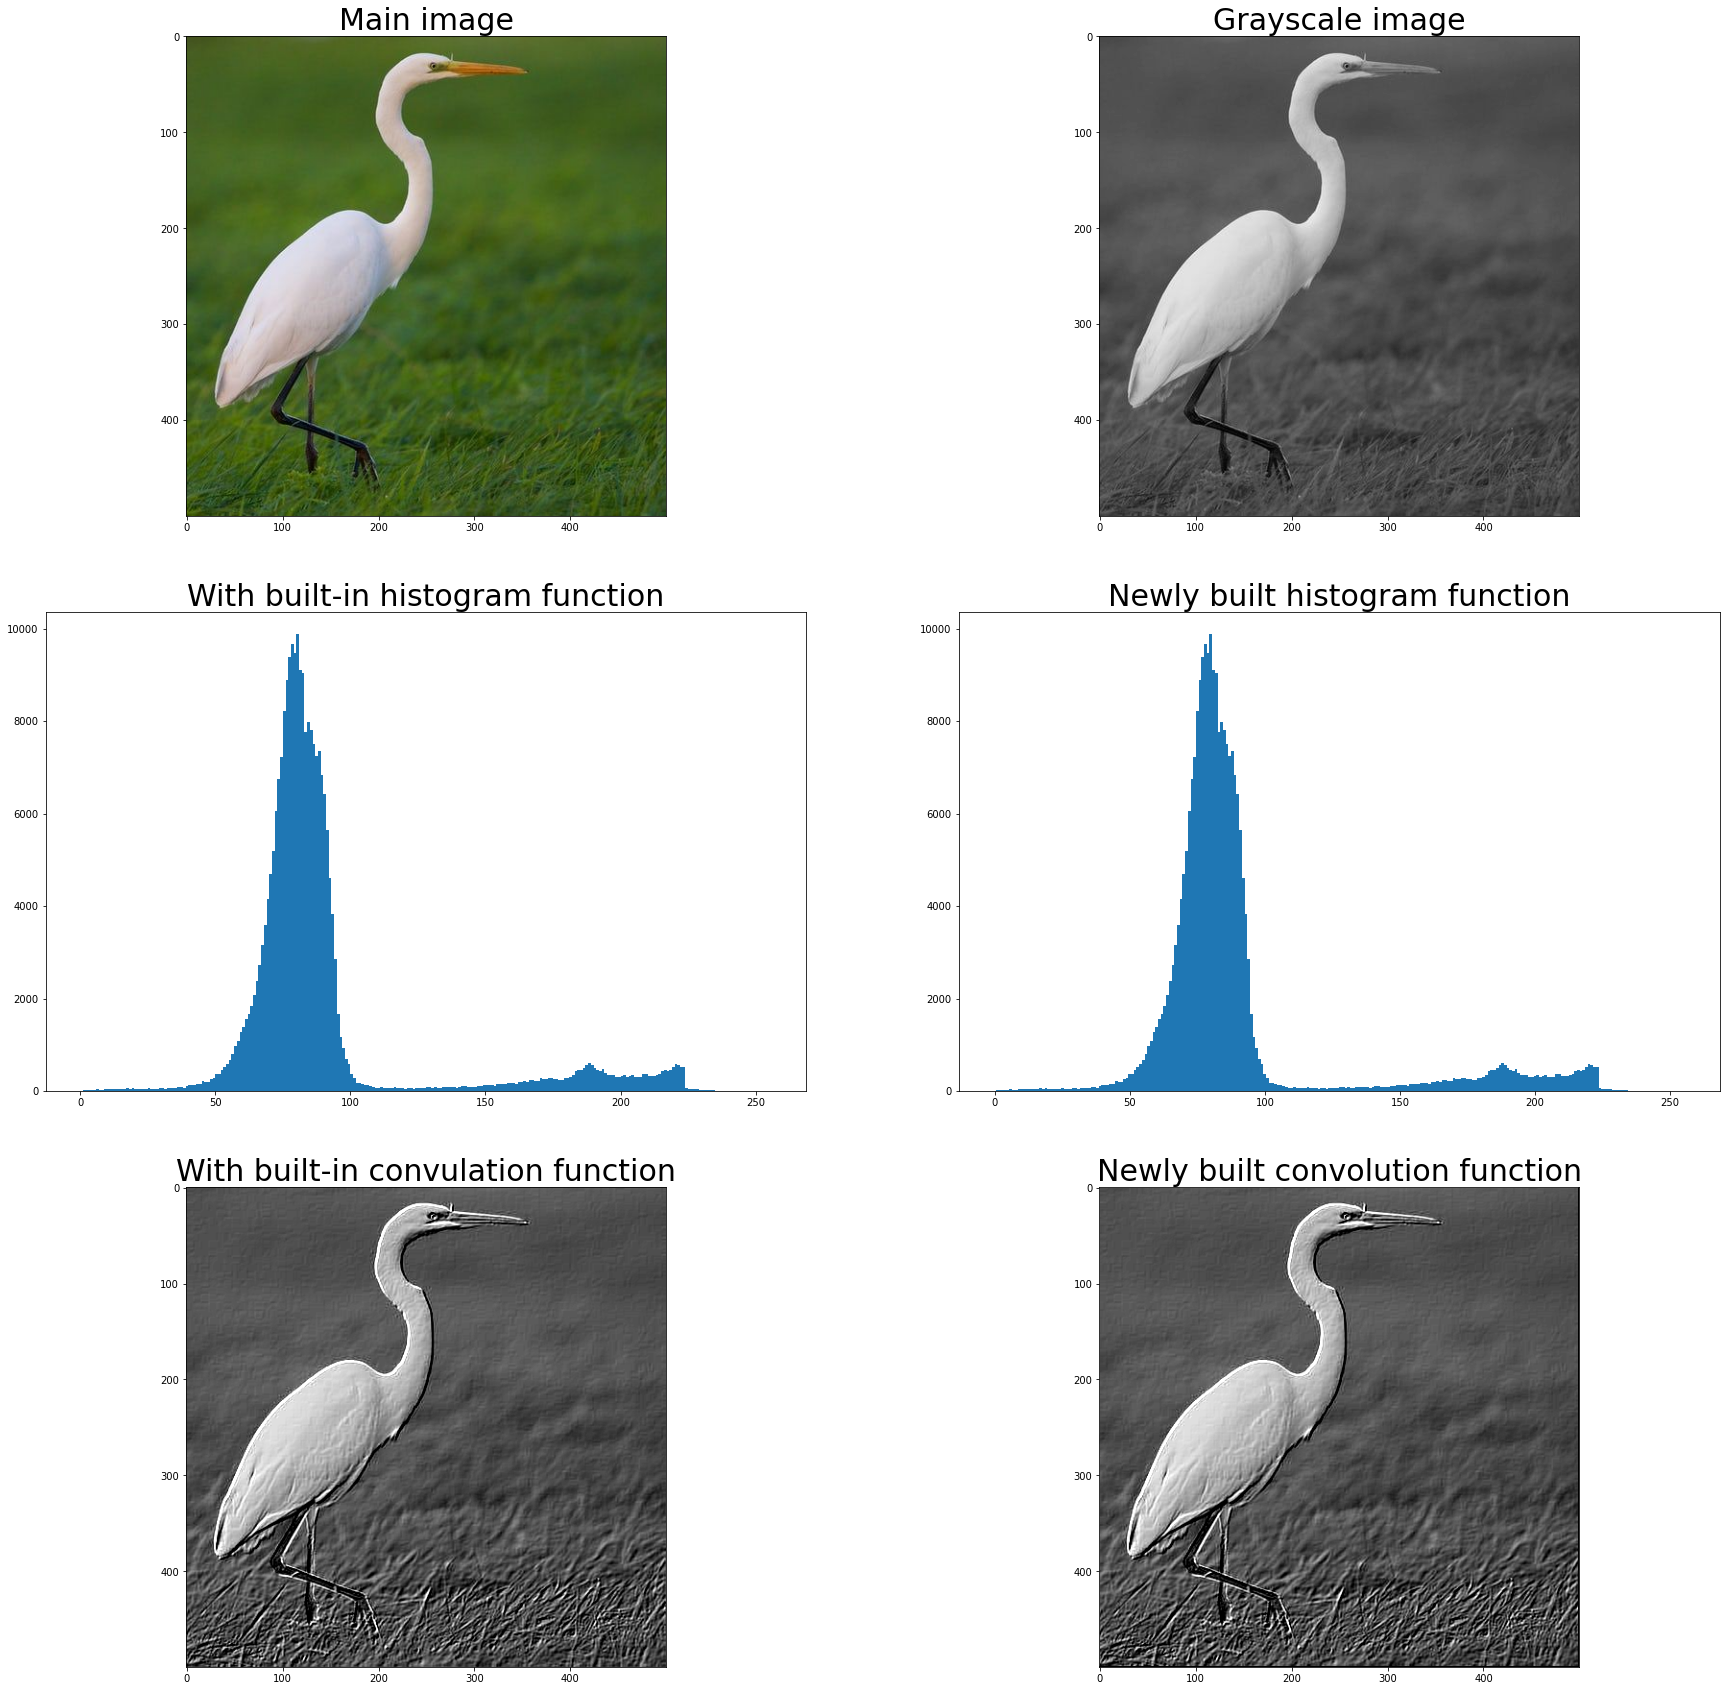

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_path = './image.jpg'
image = plt.imread(img_path)
# print(image)

subPlotX, subPlotY = 3, 2

plt.figure(figsize = (30, 30))


grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
grayscale_img = grayscale_img.reshape(-1)
axisY = np.zeros(256)
for i in range(0, len(grayscale_img)):
    axisY[grayscale_img[i]] += 1

axisX = np.array([i for i in range(0,256)])

plt.figure(figsize = (30, 30))

kernel = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
embosed_img = cv2.filter2D(grayscale_img, -1, kernel)

grayscale_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
width, height = grayscale_img.shape[0]+2, grayscale_img.shape[1]+2
padded_img = np.zeros(shape=(width,height))
padded_img[1:width-1, 1:height-1] = grayscale_img

kernelShape = kernel.shape[0]
convoluted_img = np.zeros(shape=(width-2,height-2))
for i in range(0,width-2):
    for j in range(0,height-2):
        cropped_img = padded_img[i:i+kernelShape, j:j+kernelShape]
#         print(cropped_img.shape)
        convoluted_img[i,j] = np.sum(np.multiply(cropped_img, kernel))
        if convoluted_img[i,j] < 0:
            convoluted_img[i,j] = 0
        elif convoluted_img[i,j] > 255:
            convoluted_img[i,j] = 255


plt.subplot(subPlotX, subPlotY, 1)
plt.title('Main image', fontsize=30)
plt.imshow(image)

plt.subplot(subPlotX, subPlotY, 2)
plt.title('Grayscale image', fontsize=30)
plt.imshow(grayscale_img, cmap='gray')

plt.subplot(subPlotX, subPlotY, 3)
plt.title('With built-in histogram function', fontsize=30)
plt.hist(grayscale_img.ravel(), 256, [0,256])

plt.subplot(subPlotX, subPlotY, 4)
plt.title('Newly built histogram function', fontsize=30)
plt.bar(axisX,axisY,width=1)

plt.subplot(subPlotX, subPlotY, 5)
plt.title('With built-in convulation function', fontsize = 30)
plt.imshow(embosed_img, cmap = 'gray')

plt.subplot(subPlotX, subPlotY, 6)
plt.title('Newly built convolution function', fontsize = 30)
plt.imshow(convoluted_img, cmap = 'gray')

plt.savefig('processed-image.png')